# TSP DP:  
### Travelling Salesman Problem with Dynamic Programming

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
seed = 42
np.random.seed(seed=seed)
%matplotlib inline

### Generate Parameters

In [2]:
def gen_param(num):
    path = list(range(num)) + [0]
    X, Y= np.random.random([2, num])
    XY = X + Y * 1j
    S = set(list(range(num)))
    return num, path, X, Y, XY, S

### Plot Path

In [3]:
def plot_path(path, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis('equal')
    plt.plot(X[path], Y[path], alpha=0.0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    for i in range(len(path)-1):
        plt.arrow(X[path[i]], Y[path[i]], 
                  X[path[i+1]]-X[path[i]], Y[path[i+1]]-Y[path[i]], 
                  head_width=0.02, head_length=0.02, length_includes_head=True, 
                  fc=cmap(0), ec=cmap(0))
    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

### Distance Matrix

In [4]:
def dist_mx(num):
    mx = []
    for i in range(num):
        mx.append([])
        for j in range(num):
            mx[i].append(abs(XY[i] - XY[j]))
    return mx

## TSP without DP (Slow)
10 nodes: 0.97 sec  
11 nodes: 9.49 sec

In [221]:
# Generate new parameters
num, path, X, Y, XY, S = gen_param(11)
dist = dist_mx(num)

In [222]:
def TSP(a, S, b):
    if len(S) == 0:
        return dist[a][b]

    d_min = float('inf')
    for s in S - {a}:
        d = dist[a][s] + TSP(s, S - {a, s}, b)
        if d < d_min:
            d_min = d

    return d_min

%time print('Total Distance:', TSP(0, S, 0))

Total Distance: 2.834259735803878
CPU times: user 9.23 s, sys: 9.97 ms, total: 9.24 s
Wall time: 9.25 s


## TSP DP with memo (Faster)
10 nodes: 34.5 ms  
11 nodes: 65.3 ms

In [223]:
memo = {}

def TSP_DP(a, S, b):
    if len(S) == 0:
        memo[(a, tuple(S - {a}), b)] = dist[a][b]
        return dist[a][b]

    d_min = float('inf')
    for s in S - {a}:
        if (s, tuple(S - {a, s}), b) not in memo:
            memo[(s, tuple(S - {a, s}), b)] = TSP_DP(s, S - {a, s}, b)
        d = dist[a][s] + memo[(s, tuple(S - {a, s}), b)]  
        if d < d_min:
            d_min = d

    return d_min

%time print('Total Distance:', TSP_DP(0, S, 0))

Total Distance: 2.834259735803878
CPU times: user 90.2 ms, sys: 3.44 ms, total: 93.6 ms
Wall time: 102 ms


In [224]:
# another memoization option
memo = {}

def TSP_DP(a, S, b):
    S = S - {a}
    if len(S) == 0:
        memo[(a, tuple(S), b)] = dist[a][b]
        return dist[a][b]
    
    if (a, tuple(S), b) in memo:
        return memo[(a, tuple(S), b)]
    
    d_min = min([dist[a][s] +  TSP_DP(s, S - {s}, b) for s in S])
    memo[(a, tuple(S), b)] = d_min

    return d_min

%time print('Total Distance:', TSP_DP(0, S, 0))

Total Distance: 2.834259735803878
CPU times: user 72.4 ms, sys: 3.42 ms, total: 75.8 ms
Wall time: 75 ms


## Generate Tour

Tour: [0, 8, 10, 5, 15, 11, 4, 13, 12, 7, 3, 6, 2, 9, 14, 1, 0]


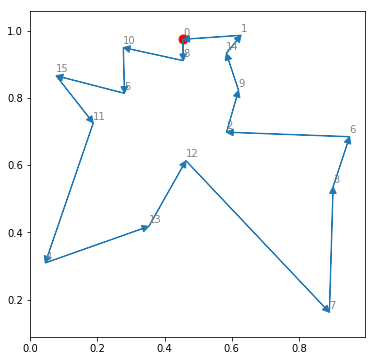

In [218]:
P = [0]  # starting from to "0"

for i in range(num - 2, -1, -1):
    d_min = np.inf
    p_min = None
    for m in memo:
        if len(m[1]) == i and  set(P) | {m[0]} | set(m[1]) == S:
            d = dist[P[-1]][m[0]] + memo[m]
            if d < d_min:
                d_min = d
                p_min = m[0]
    P.append(p_min)

print('Tour:', P + [0])
plot_path(P + [0])

## Solution:  
#### Example:
<pre>
S = {0, 1, 2, 3}

TSP(0, {1, 2, 3}, 0) = min(dist[0][1] + TSP(1, {2, 3}, 0), 
                           dist[0][2] + TSP(2, {1, 3}, 0),
                           dist[0][3] + TSP(3, {1, 2}, 0))

TSP(1, {2, 3}, 0)    = min(dist[1][2] + TSP(2, {3}, 0), 
                           dist[1][3] + TSP(3, {2}, 0))
TSP(2, {1, 3}, 0)    = min(dist[2][1] + TSP(1, {3}, 0), 
                           dist[2][3] + TSP(3, {1}, 0))
TSP(3, {1, 2}, 0)    = min(dist[3][1] + TSP(1, {2}, 0), 
                           dist[3][2] + TSP(2, {1}, 0))

TSP(2, {3}, 0)       = min(dist[2][3] + TSP(3, {}, 0))
TSP(3, {2}, 0)       = min(dist[3][2] + TSP(2, {}, 0))
TSP(1, {3}, 0)       = min(dist[1][3] + TSP(3, {}, 0))
TSP(3, {1}, 0)       = min(dist[3][1] + TSP(1, {}, 0))
TSP(1, {2}, 0)       = min(dist[1][2] + TSP(2, {}, 0))
TSP(2, {1}, 0)       = min(dist[2][1] + TSP(1, {}, 0))

TSP(1, {}, 0))       = dist[1][0]
TSP(2, {}, 0))       = dist[2][0]
TSP(3, {}, 0))       = dist[3][0]
</pre>

## TSP Bit-DP with memoization

In [219]:
def memoize(f):
    cache = {}
    def func(*args):
        if not args in cache:
            cache[args] = f(*args)
        return cache[args]
    return func

@memoize
def TSP_BitDP(pos, visited):
    if (1 << num) - 1 == visited: # if all visited
        return dist[pos][0]
    
    d_min = np.inf
    for i in range(num):
        if (visited & (1 << i)) == 0: # if not visited
            d = dist[pos][i] + TSP_BitDP(i, visited | (1 << i))
            if d < d_min:
                d_min = d
    return d_min

%time print('Total Length:', TSP_BitDP(0, 1))

Total Length: 3.766406692306571
CPU times: user 1.9 s, sys: 23.2 ms, total: 1.92 s
Wall time: 1.93 s
